Dviejų pirmos eilės diferencialinių lygčių 
su ortogonaliais krypčių laukais 

(žr. antros paskaitos 9-ą skaidrę) 
integralinių kreivių braižymas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc

def CauchyProblem(F, x0, y0, x):
    N = x.size-1
    N0 = round(N*(x0-x[0])/(x[-1]-x[0]))
    x = x + (x0-x[N0])
    y = np.zeros(N+1)
    y[N0] = y0
    yp = sc.odeint(F, y0, x[N0:])
    yn = sc.odeint(F, y0, x[N0::-1])
    y = np.concatenate( ( yn.flatten()[:0:-1], yp.flatten() ) )
    return (x,y)  

C:\Users\Arnas\AppData\Local\Temp\ipykernel_13392\4082782410.py:15: RuntimeWarning: invalid value encountered in divide
  PS = PS / LS
C:\Users\Arnas\AppData\Local\Temp\ipykernel_13392\4082782410.py:16: RuntimeWarning: invalid value encountered in divide
  QS = QS / LS
c:\Users\Arnas\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


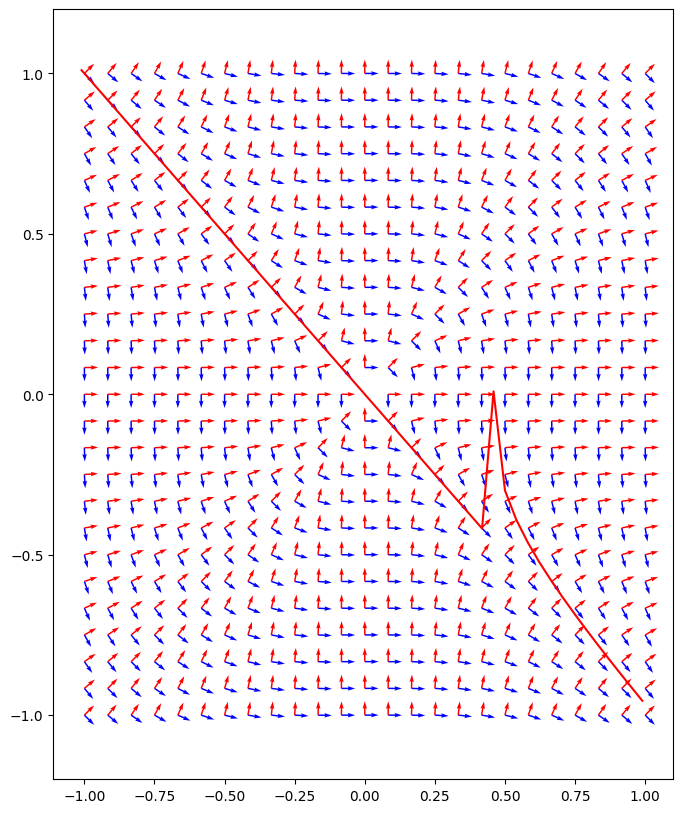

In [17]:
def plot_orthogonal_and_default_direction_fields(
        P, Q, 
        bounds = [(-1,1), (-1,1)],
        samples = 25,
        initial_point = (0, 0)):
    X = np.linspace(bounds[0][0], bounds[0][1], samples)
    Y = np.linspace(bounds[1][0], bounds[1][1], samples)
    XS, YS = np.meshgrid(X, Y)

    PS = P(XS, YS) 
    QS = Q(XS, YS)

    LS = np.sqrt(PS ** 2 + QS ** 2)

    PS = PS / LS
    QS = QS / LS

    plt.figure( figsize = (8, 8) )
    plt.quiver(XS, YS, QS, -PS, color = "blue")
    plt.quiver(XS, YS, PS,  QS, color =  "red")

    XM = np.linspace(bounds[0][0], bounds[0][1], samples * 2)

    plt.plot( 
        *CauchyProblem(
            lambda y, x: -P(x, y) / Q(x, y), 
            initial_point[0], 
            initial_point[1], 
            XM
        ), 
        color="red"
    )

    plt.ylim([bounds[1][0] - 0.2, bounds[1][1] + 0.2])
    plt.show()

    return PS



# keisti parametrus cia
a =  plot_orthogonal_and_default_direction_fields(
    lambda x, _: x**2, 
    lambda _, y: y**2,
    initial_point=(0.5, -0.3))

In [5]:
def dir_field(
        P, Q, # differential form expressions: P(x, y)dx + Q(x, y)dy = 0
        bounds = [(-1,1), (-1,1)],
        samples = 25, 
        color = "blue"):
    X = np.linspace(bounds[0][0], bounds[0][1], samples)
    Y = np.linspace(bounds[1][0], bounds[1][1], samples)
    XS, YS = np.meshgrid(X, Y)

    PS = P(XS, YS) 
    QS = Q(XS, YS)

    LS = np.sqrt(PS ** 2 + QS ** 2)

    PS = PS / LS
    QS = QS / LS
    return (XS, YS, PS, QS)
    plt.figure(figsize = (8, 8))
    plt.quiver(XS, YS, PS,  QS, color = color)
    plt.show()

C:\Users\Arnas\AppData\Local\Temp\ipykernel_10104\429206139.py:15: RuntimeWarning: invalid value encountered in divide
  PS = PS / LS
C:\Users\Arnas\AppData\Local\Temp\ipykernel_10104\429206139.py:16: RuntimeWarning: invalid value encountered in divide
  QS = QS / LS


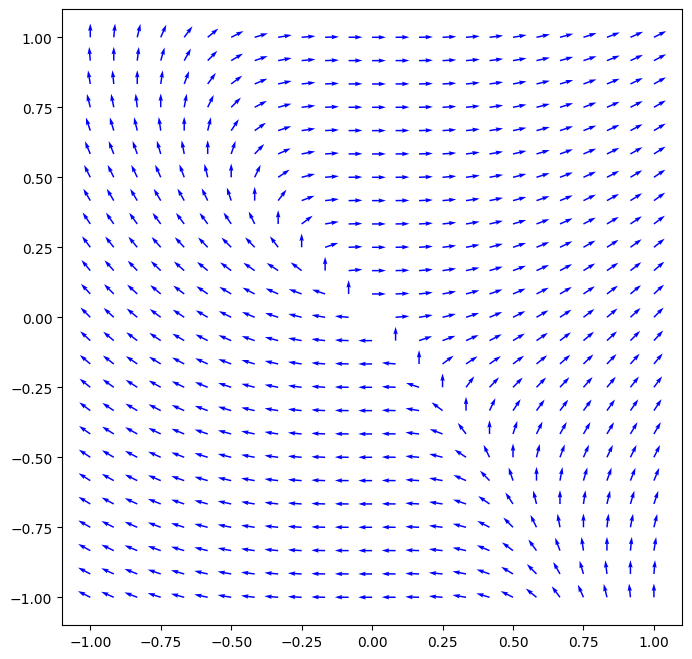

In [6]:

plot_dir_field(lambda x, y: x + y, lambda x, y: x ** 2)
